In [1]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/andreanavarrete/workspace/columbia/courses/capstone/BlackLivesMatter/dsi-capstone-f19-group-1-51b3e5d95350.json'


In [2]:
import json
import matplotlib.pyplot as plt
import re
import swifter

from google.cloud import bigquery

%load_ext google.cloud.bigquery
plt.style.use('fivethirtyeight')

# Read tweets

In [ ]:
keys = ['Pronoun', 'Ppron',
        'I', 'We', 'You', 'SheHe', 'They',
        'Anger', 'Sad',
        'Sexual', 
        'Negate',
        'Social', 'Family', 'Friend',
        'Percept', 
        'Swear',
        'Drives', 'Affiliation',
        'Achieve', 'Power', 'Reward', 
        'Risk', 'Death']

In [3]:
bigquery_client = bigquery.Client(project='dsi-capstone-f19-group-1')

In [180]:
%%bigquery tweets
SELECT
    id, created_at, cleaned_text_length, is_retweet,
    Pronoun_length / cleaned_text_length as pronoun_ratio,
    Ppron_length / cleaned_text_length as ppron_ratio,
    I_length / cleaned_text_length as i_ratio,
    We_length / cleaned_text_length as we_ratio,
    You_length / cleaned_text_length as you_ratio,
    SheHe_length / cleaned_text_length as shehe_ratio,
    They_length / cleaned_text_length as they_ratio,
    Anger_length / cleaned_text_length as anger_ratio, 
    Sad_length / cleaned_text_length as sad_ratio,
    Sexual_length / cleaned_text_length as sexual_ratio,
    Negate_length / cleaned_text_length as negate_ratio,
    Social_length / cleaned_text_length as social_ratio,
    Family_length / cleaned_text_length as family_ratio,
    Friend_length / cleaned_text_length as friend_ratio,
    Percept_length / cleaned_text_length as percept_ratio,
    Swear_length / cleaned_text_length as swear_ratio,
    Drives_length / cleaned_text_length as drives_ratio,
    Affiliation_length / cleaned_text_length as affiliation_ratio,
    Achieve_length / cleaned_text_length as achieve_ratio,
    Power_length / cleaned_text_length as power_ratio,
    Risk_length / cleaned_text_length as risk_ratio,
    Death_length / cleaned_text_length as death_ratio,
    Reward_length / cleaned_text_length as reward_ratio
FROM features.lwic
LIMIT 100000
;

In [181]:
tweets.shape

(100000, 27)

In [182]:
tweets.head()

,id,created_at,cleaned_text_length,is_retweet,pronoun_ratio,ppron_ratio,i_ratio,we_ratio,you_ratio,shehe_ratio,...,friend_ratio,percept_ratio,swear_ratio,drives_ratio,affiliation_ratio,achieve_ratio,power_ratio,risk_ratio,death_ratio,reward_ratio
0,498056511118376960,2014-08-09 10:41:40+00:00,23,False,0.130435,0.086957,0.000000,0.000000,0.0,0.086957,...,0.000000,0.000000,0.0,0.260870,0.217391,0.0,0.086957,0.0,0.000000,0.043478
1,498294036961046500,2014-08-10 02:25:30+00:00,21,True,0.142857,0.095238,0.000000,0.047619,0.0,0.047619,...,0.000000,0.000000,0.0,0.285714,0.142857,0.0,0.095238,0.0,0.000000,0.047619
2,500325983811928060,2014-08-15 16:59:44+00:00,26,False,0.230769,0.153846,0.115385,0.038462,0.0,0.000000,...,0.000000,0.038462,0.0,0.230769,0.038462,0.0,0.153846,0.0,0.000000,0.038462
3,500338583476002800,2014-08-15 17:49:48+00:00,21,True,0.142857,0.142857,0.000000,0.047619,0.0,0.047619,...,0.000000,0.047619,0.0,0.285714,0.238095,0.0,0.047619,0.0,0.047619,0.000000
4,501498606080520200,2014-08-18 22:39:19+00:00,23,False,0.130435,0.130435,0.000000,0.130435,0.0,0.000000,...,0.043478,0.043478,0.0,0.260870,0.217391,0.0,0.043478,0.0,0.000000,0.000000


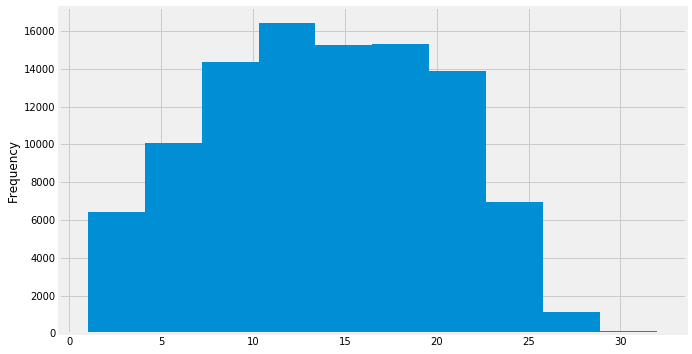

In [183]:
tweets['cleaned_text_length'].plot.hist(figsize=(10,6))

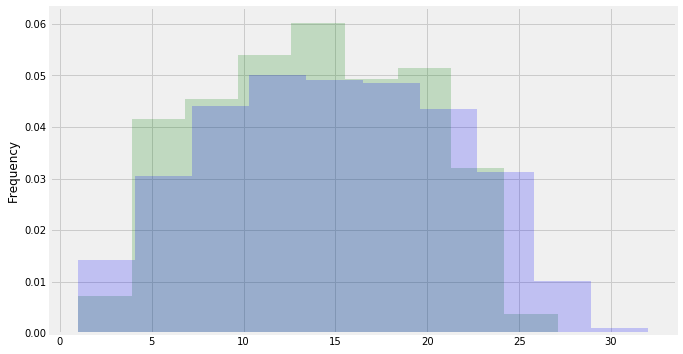

In [184]:
ax = tweets[tweets['is_retweet'] == True]['cleaned_text_length'].plot.hist(figsize=(10,6),
                                                   alpha=0.2, color='green',density=1, bins=10)
tweets[tweets['is_retweet'] == False]['cleaned_text_length'].plot.hist(ax=ax,
                                                   alpha=0.2, color='blue', density=1, bins=10)


In [185]:
tweets['date'] = tweets['created_at'].apply(lambda x: x.date())
tweets.head()

,id,created_at,cleaned_text_length,is_retweet,pronoun_ratio,ppron_ratio,i_ratio,we_ratio,you_ratio,shehe_ratio,...,percept_ratio,swear_ratio,drives_ratio,affiliation_ratio,achieve_ratio,power_ratio,risk_ratio,death_ratio,reward_ratio,date
0,498056511118376960,2014-08-09 10:41:40+00:00,23,False,0.130435,0.086957,0.000000,0.000000,0.0,0.086957,...,0.000000,0.0,0.260870,0.217391,0.0,0.086957,0.0,0.000000,0.043478,2014-08-09
1,498294036961046500,2014-08-10 02:25:30+00:00,21,True,0.142857,0.095238,0.000000,0.047619,0.0,0.047619,...,0.000000,0.0,0.285714,0.142857,0.0,0.095238,0.0,0.000000,0.047619,2014-08-10
2,500325983811928060,2014-08-15 16:59:44+00:00,26,False,0.230769,0.153846,0.115385,0.038462,0.0,0.000000,...,0.038462,0.0,0.230769,0.038462,0.0,0.153846,0.0,0.000000,0.038462,2014-08-15
3,500338583476002800,2014-08-15 17:49:48+00:00,21,True,0.142857,0.142857,0.000000,0.047619,0.0,0.047619,...,0.047619,0.0,0.285714,0.238095,0.0,0.047619,0.0,0.047619,0.000000,2014-08-15
4,501498606080520200,2014-08-18 22:39:19+00:00,23,False,0.130435,0.130435,0.000000,0.130435,0.0,0.000000,...,0.043478,0.0,0.260870,0.217391,0.0,0.043478,0.0,0.000000,0.000000,2014-08-18


In [186]:
## Functions
def pivot_table_metrics(keys):
    d  = {'{}_ratio'.format(x) : [np.mean, np.median, np.nanstd] for x in keys }
    df_pivot = tweets.pivot_table(index='date',  aggfunc=d).reset_index()
    df_pivot.columns = ['_'.join(list(x)) for x in df_pivot.columns]
    return df_pivot

def plot_timeline(df, key):
    fig, ax = plt.subplots(figsize=(15,6))


    # Visualize the result
    mean_d = plt.plot(df['date_'], 
                  df['{}_ratio_mean'.format(key)], '-', 
                  label='Mean Ratio')
    # std
    min_= list((df['{}_ratio_mean'.format(key)] -  df['{}_ratio_nanstd'.format(key)]).values)
    max_ = list((df['{}_ratio_mean'.format(key)] +  df['{}_ratio_nanstd'.format(key)]).values)
    
    std_d = plt.fill_between(df['date_'], 
                 max(list(np.zeros(df.shape[0])), 
                     min_), 
                 max_,
                 color='gray', alpha=0.2,
                label='Std Ratio')
    plt.title('{} Ratio Timeline'.format(key.capitalize()), size=20)
    plt.ylabel('Number of days', size=15)
    plt.xlabel('Date of creation', size=15)
    plt.ylim(0,max(max_))
    plt.legend()
    
def plot_means(df, keys):
    fig, ax = plt.subplots(figsize=(15,6))
    for key in keys:
        ax.plot(df['date_'], 
                  df['{}_ratio_mean'.format(key)], '-', 
                  label='{} Mean Ratio'.format(key.capitalize()))
    plt.legend()

## Emotions

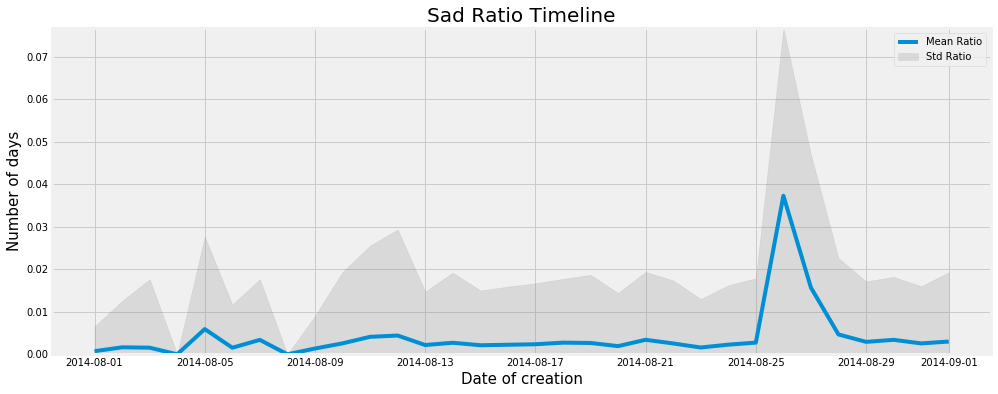

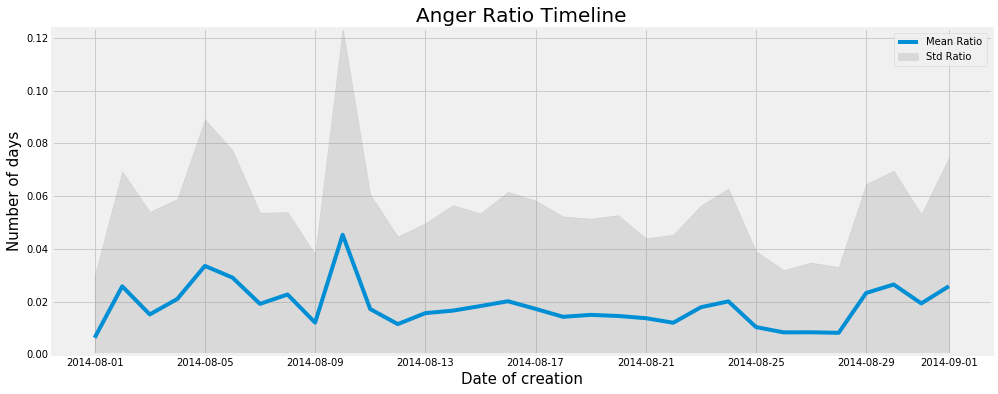

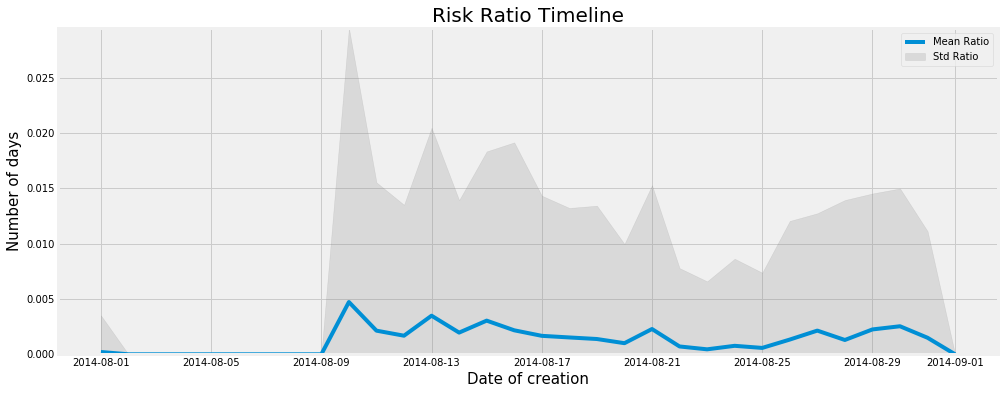

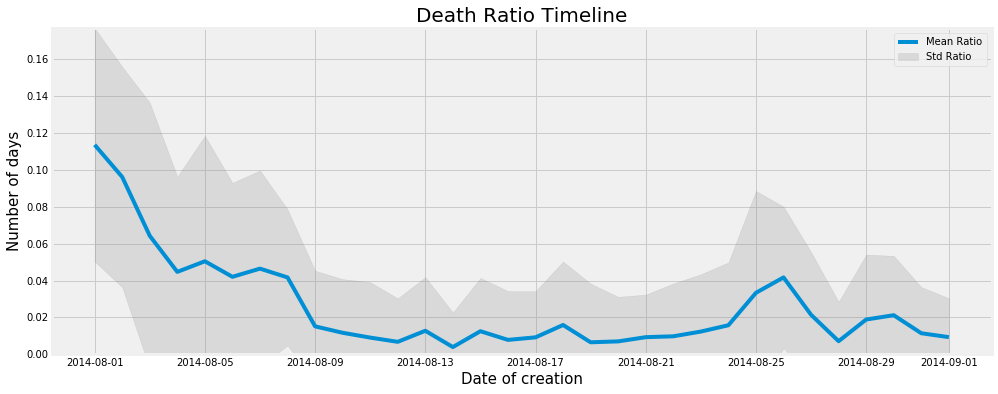

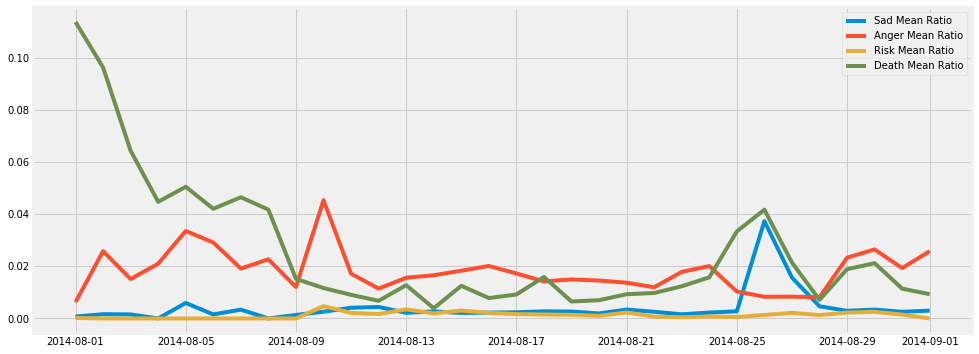

In [187]:
emotion_keys = ['sad', 'anger', 'risk', 'death']

df_emotions = pivot_table_metrics(emotion_keys)

for key in emotion_keys:
    plot_timeline(df_emotions, key)
    
plot_means(df_emotions, emotion_keys)

## Pronouns

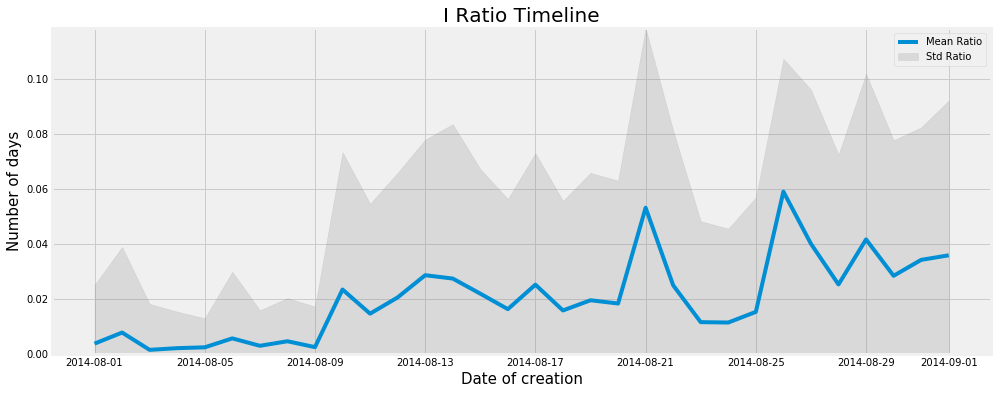

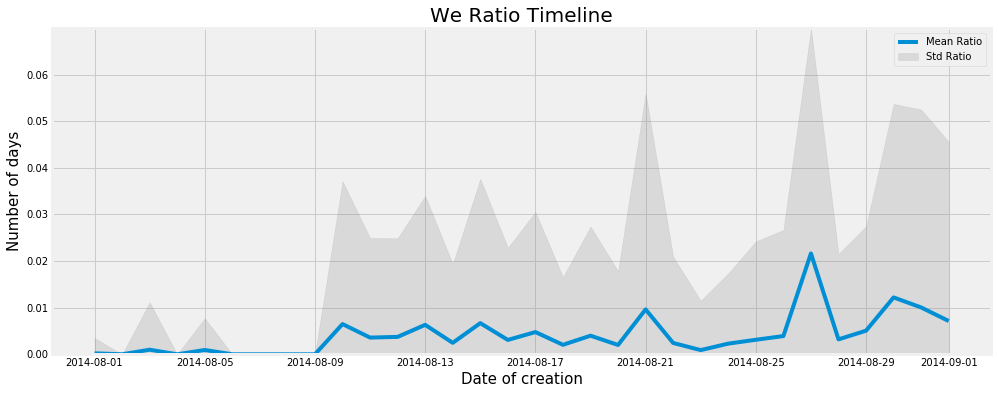

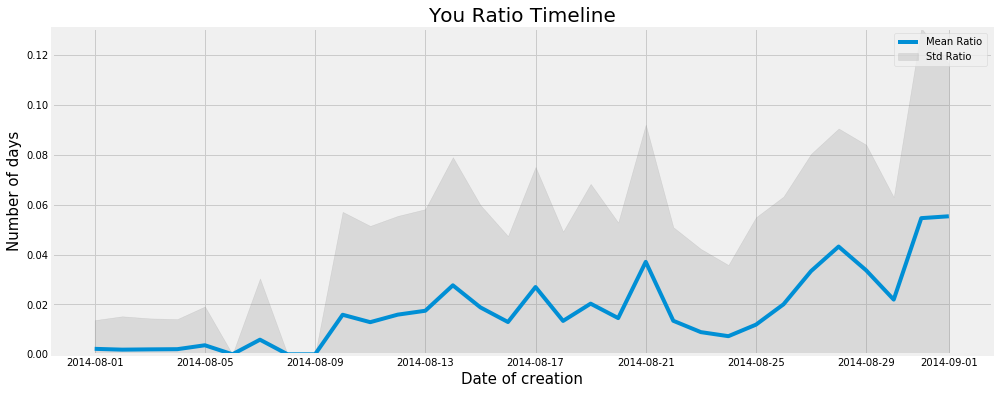

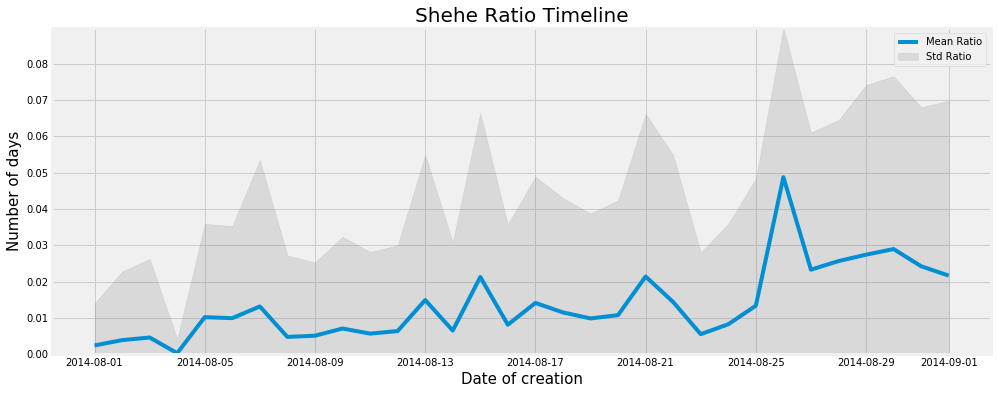

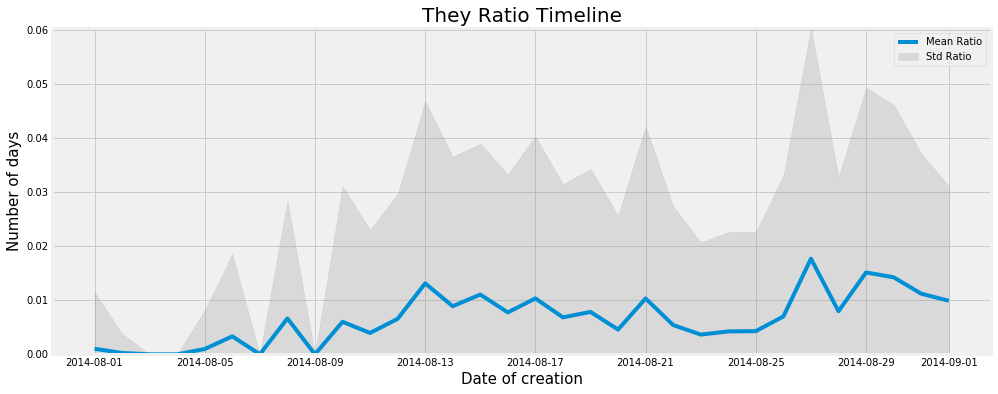

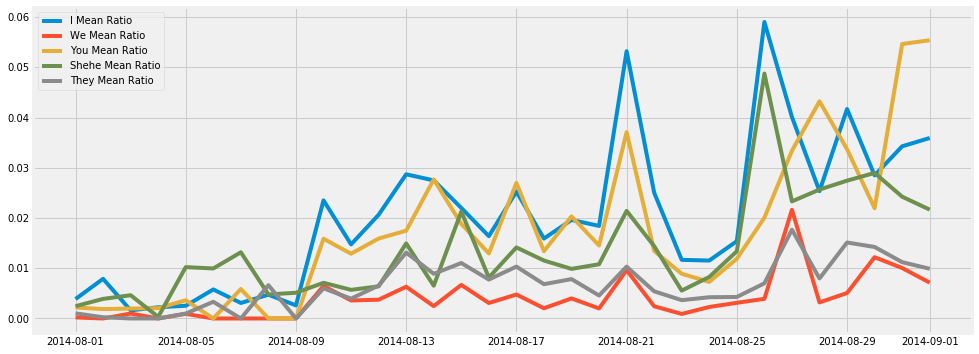

In [188]:
## PRonouns
pronoun_keys = ['i', 'we', 'you', 'shehe', 'they']

df_pronouns = pivot_table_metrics(pronoun_keys)

for key in pronoun_keys:
    plot_timeline(df_pronouns, key)
    
plot_means(df_pronouns, pronoun_keys)

## Social

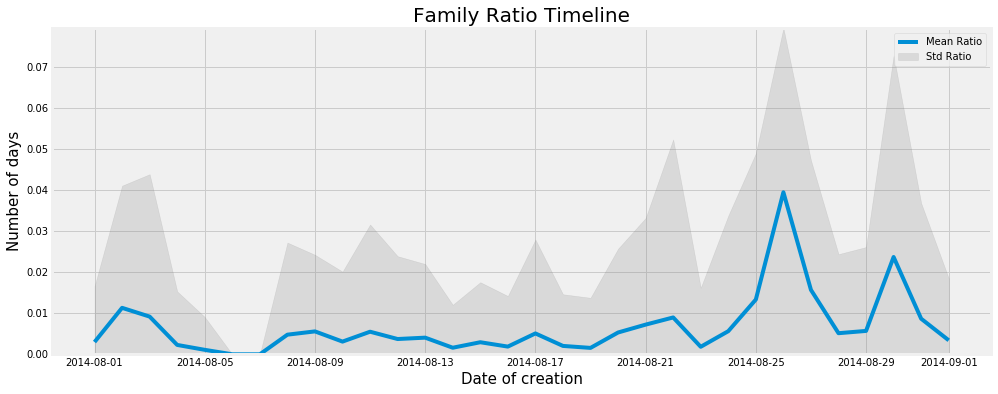

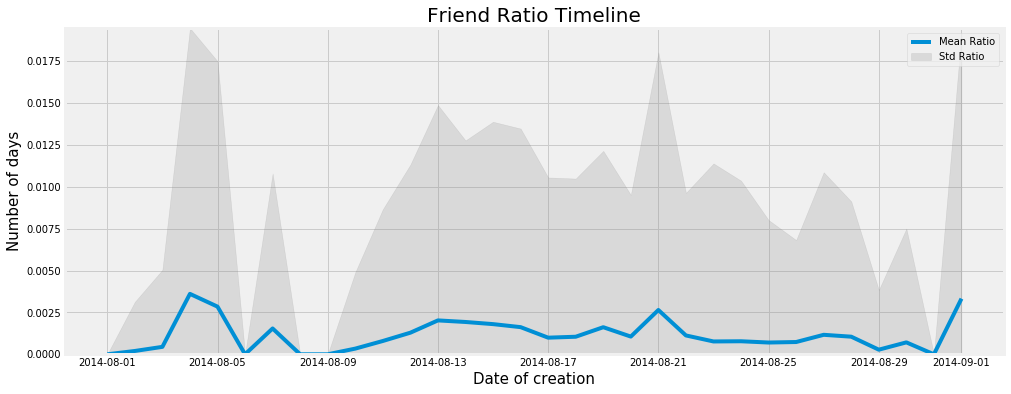

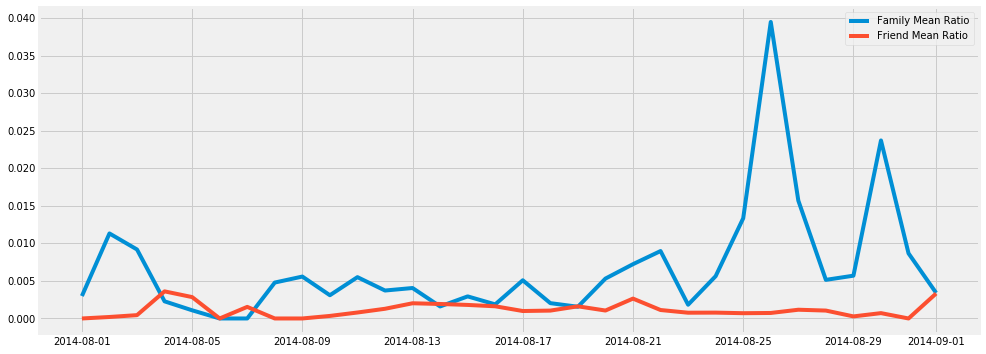

In [189]:
## PRonouns
social_keys = ['family', 'friend']

df_social = pivot_table_metrics(social_keys)

for key in social_keys:
    plot_timeline(df_social, key)
    
plot_means(df_social, social_keys)

## Other

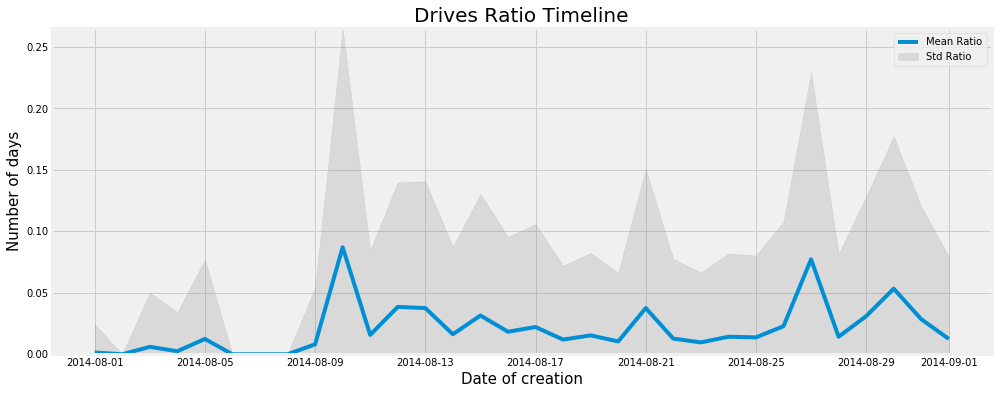

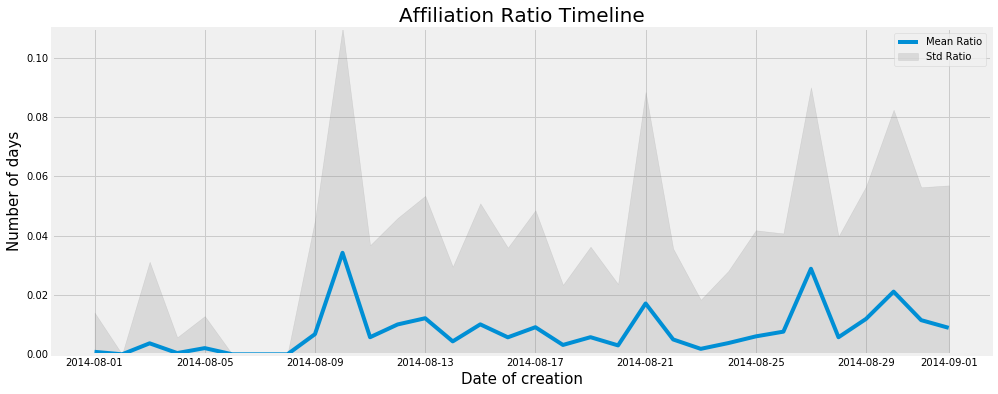

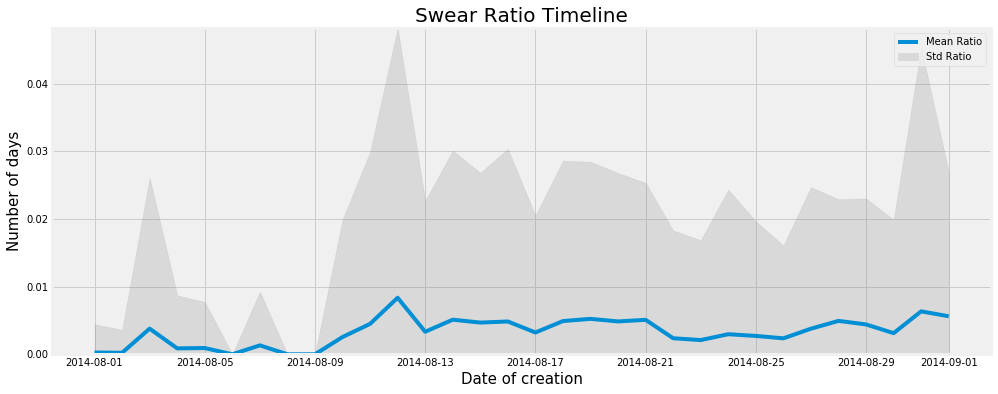

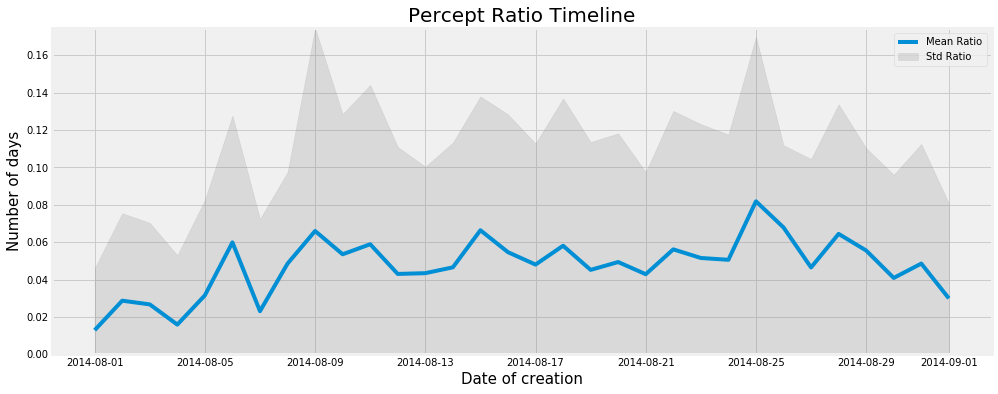

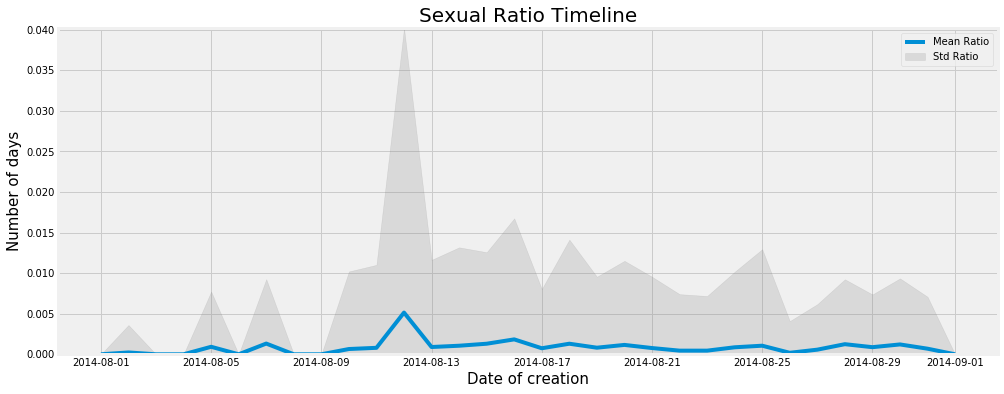

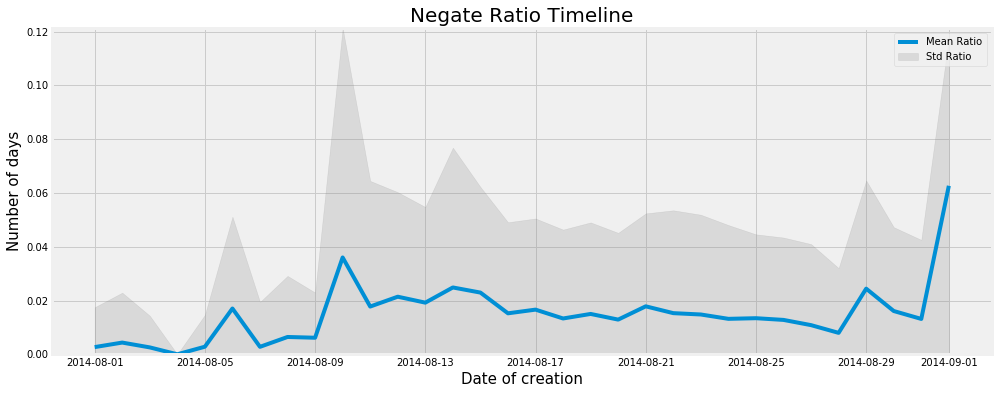

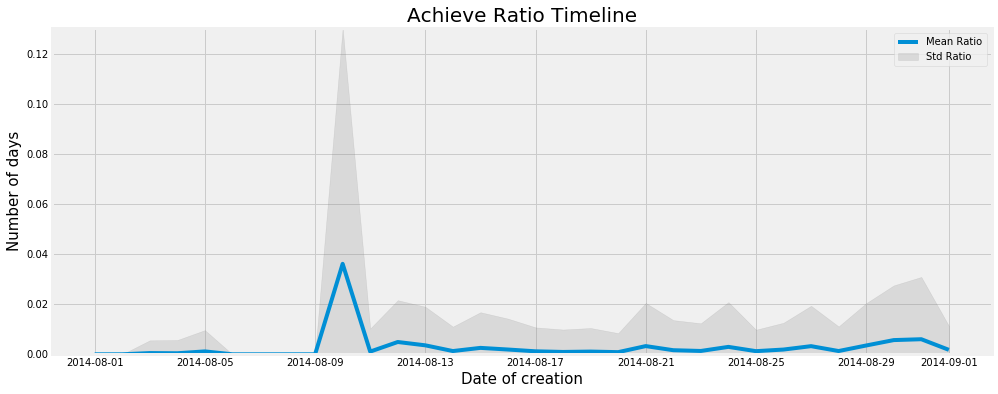

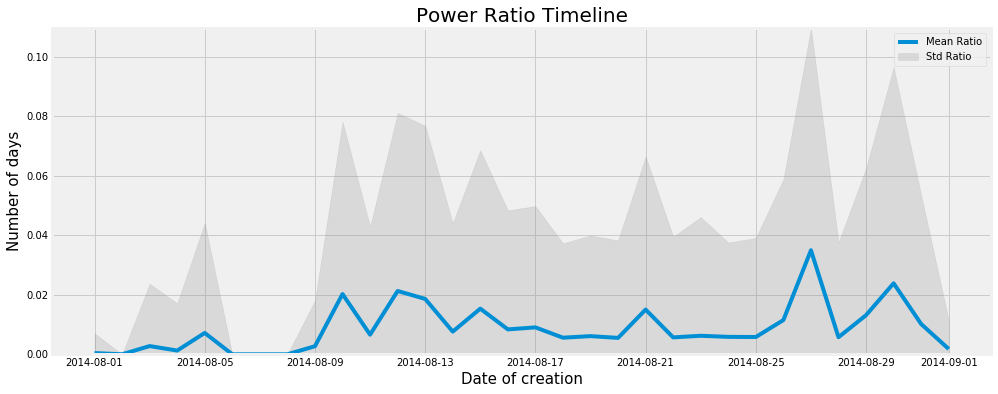

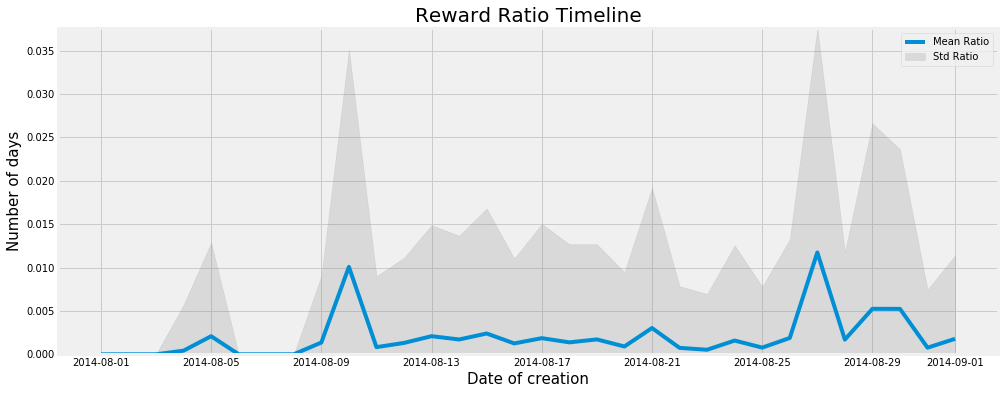

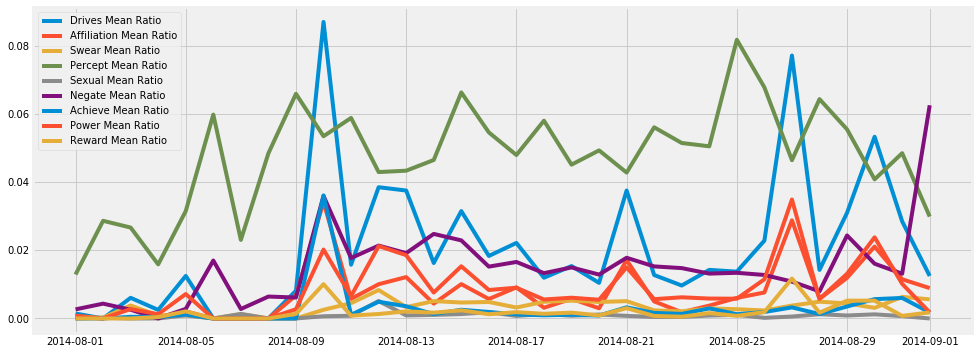

In [194]:
other_keys = ['drives', 'affiliation',
              'swear', 'percept',
              'sexual', 'negate',
        'achieve', 'power', 'reward']

df_other = pivot_table_metrics(other_keys)

for key in other_keys:
    plot_timeline(df_other, key)
    
plot_means(df_other, other_keys)